#**Ejercicio 4**

vizualizacion de los datos

In [186]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import pyarrow.parquet as pq
from datetime import date
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

drive.mount('/content/drive')
tracks=pd.read_csv('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ4/playlist_spotify.csv')
tracks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745


Resumen estadistico :

In [187]:
# Resumen estadístico de los datos
print("\nResumen estadístico de los datos:")
print(tracks.describe())

# Información sobre los tipos de datos
print("\nInformación sobre los tipos de datos:")
print(tracks.info())


Resumen estadístico de los datos:
       acousticness  danceability       duration      energy  \
count    750.000000    750.000000     750.000000  750.000000   
mean       0.357394      0.596439  220112.733333    0.594188   
std        0.338405      0.172036   65587.690483    0.253301   
min        0.000001      0.107000   33840.000000    0.009250   
25%        0.037150      0.480000  185490.250000    0.423250   
50%        0.244500      0.606000  215108.500000    0.631500   
75%        0.678500      0.715750  244236.750000    0.804750   
max        0.994000      0.986000  675360.000000    0.995000   

       instrumentalness         key    liveness    loudness        mode  \
count        750.000000  750.000000  750.000000  750.000000  750.000000   
mean           0.100245    4.829333    0.203376   -8.509339    0.741333   
std            0.259921    3.636001    0.177609    5.039488    0.438194   
min            0.000000    0.000000    0.024000  -29.601000    0.000000   
25%          


Análisis de la variable cuantitativa: acousticness
Media: 0.35739417323999995
Mediana: 0.2445
Moda: 0.992
Desviación estándar: 0.3384052776221886
Rango: 0.99399883


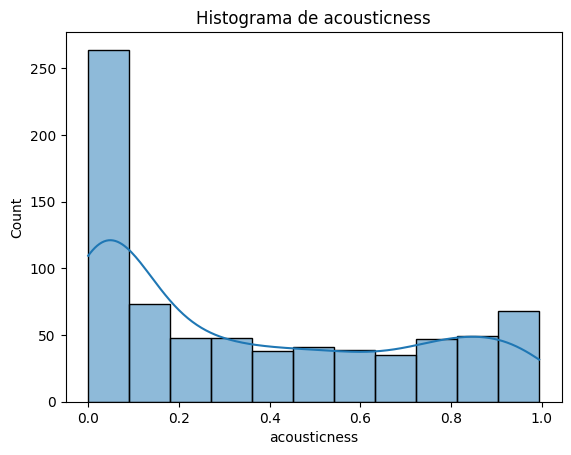


Análisis de la variable cuantitativa: danceability
Media: 0.5964386666666667
Mediana: 0.606
Moda: 0.525
Desviación estándar: 0.172036411671512
Rango: 0.879


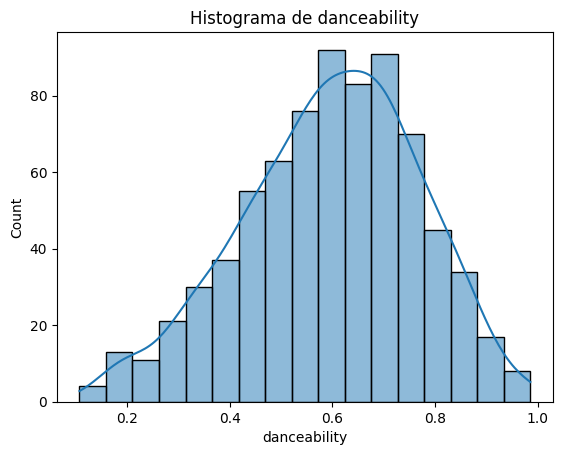


Análisis de la variable cuantitativa: duration
Media: 220112.73333333334
Mediana: 215108.5
Moda: 213440
Desviación estándar: 65587.69048284946
Rango: 641520


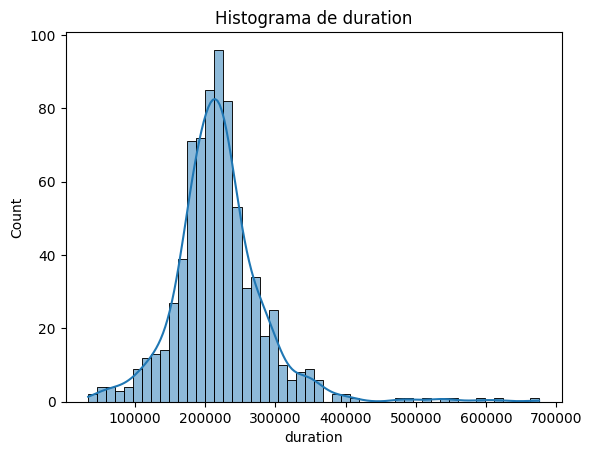


Análisis de la variable cuantitativa: energy
Media: 0.5941879333333333
Mediana: 0.6315
Moda: 0.666
Desviación estándar: 0.25330130299281806
Rango: 0.98575


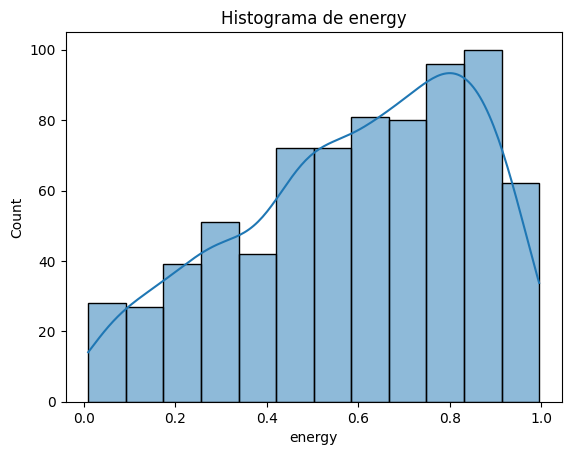


Análisis de la variable cuantitativa: instrumentalness
Media: 0.10024481392
Mediana: 1.02e-05
Moda: 0.0
Desviación estándar: 0.25992145476369927
Rango: 0.967


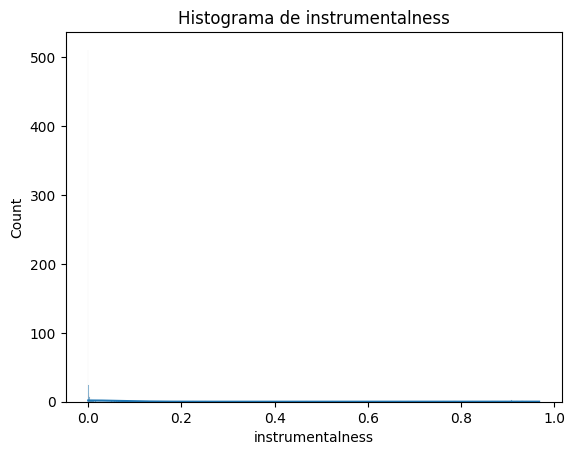


Análisis de la variable cuantitativa: key
Media: 4.8293333333333335
Mediana: 5.0
Moda: 0
Desviación estándar: 3.6360005806543643
Rango: 11


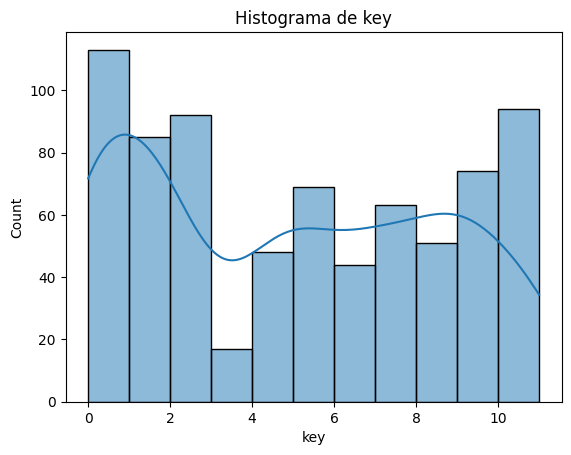


Análisis de la variable cuantitativa: liveness
Media: 0.20337613333333332
Mediana: 0.129
Moda: 0.102
Desviación estándar: 0.1776086158691543
Rango: 0.955


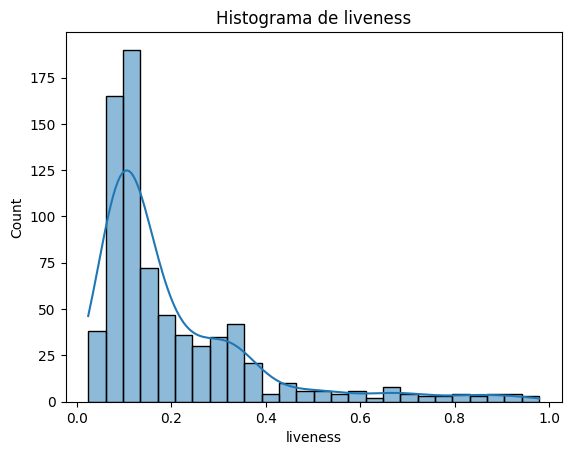


Análisis de la variable cuantitativa: loudness
Media: -8.509338666666668
Mediana: -7.27
Moda: -7.273
Desviación estándar: 5.039488426627019
Rango: 29.067999999999998


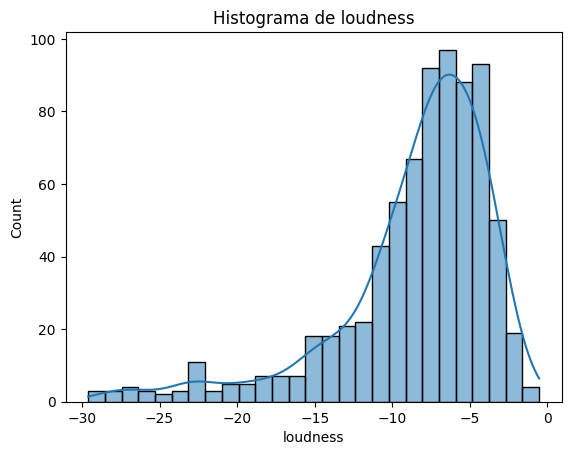


Análisis de la variable cuantitativa: mode
Media: 0.7413333333333333
Mediana: 1.0
Moda: 1
Desviación estándar: 0.43819429618663935
Rango: 1


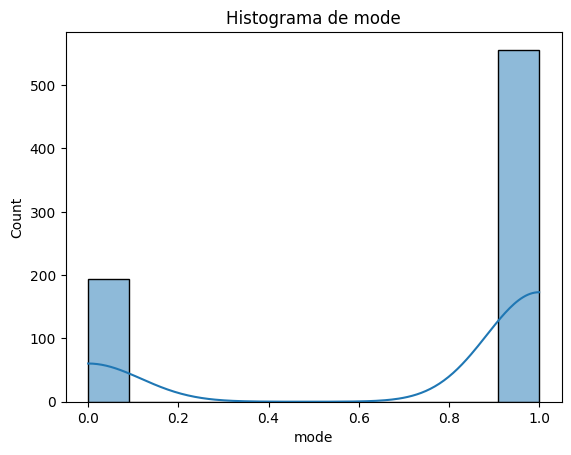


Análisis de la variable cuantitativa: speechiness
Media: 0.09896626666666668
Mediana: 0.04875
Moda: 0.0349
Desviación estándar: 0.10471451593989692
Rango: 0.6976


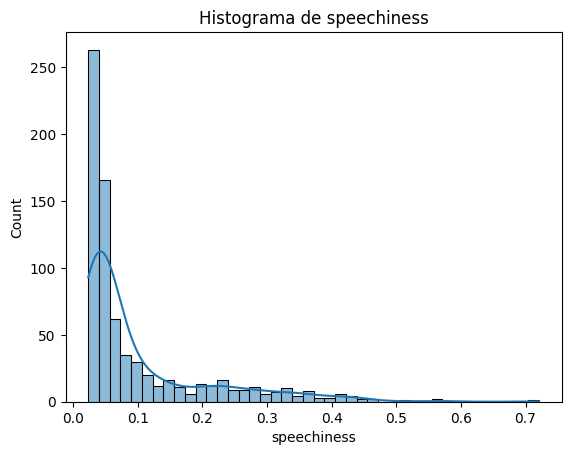


Análisis de la variable cuantitativa: tempo
Media: 120.40576133333333
Mediana: 120.1045
Moda: 89.019
Desviación estándar: 28.37811642083557
Rango: 148.41500000000002


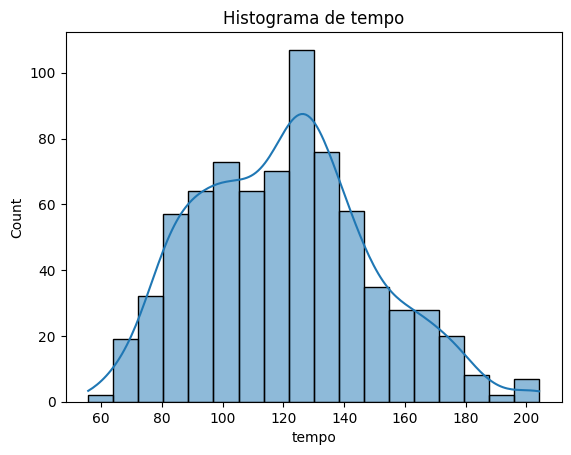


Análisis de la variable cuantitativa: time_signature
Media: 3.9026666666666667
Mediana: 4.0
Moda: 4
Desviación estándar: 0.40009122235288375
Rango: 4


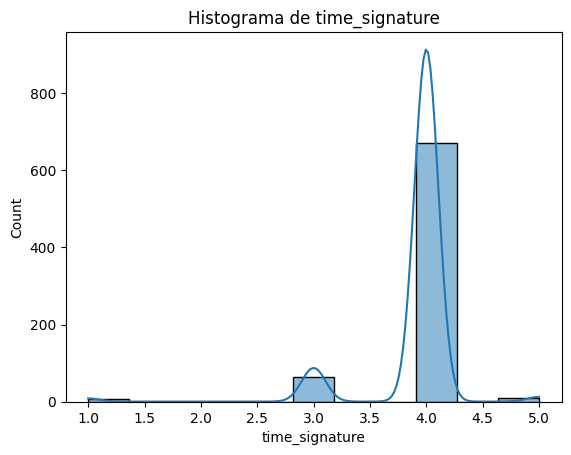


Análisis de la variable cuantitativa: valence
Media: 0.4973214666666667
Mediana: 0.483
Moda: 0.199
Desviación estándar: 0.23961490066356228
Rango: 0.9418


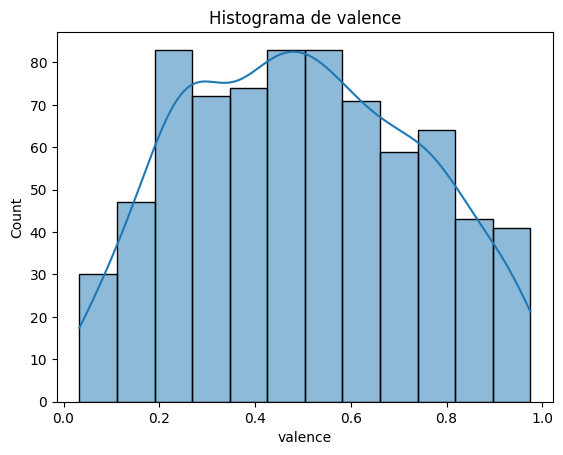

In [221]:
# Análisis de variables cuantitativas
for column in tracks.select_dtypes(include=np.number):
  print(f"\nAnálisis de la variable cuantitativa: {column}")
  print(f"Media: {tracks[column].mean()}")
  print(f"Mediana: {tracks[column].median()}")
  print(f"Moda: {tracks[column].mode()[0]}")
  print(f"Desviación estándar: {tracks[column].std()}")
  print(f"Rango: {tracks[column].max() - tracks[column].min()}")
  plt.figure()
  sns.histplot(tracks[column], kde=True)
  plt.title(f"Histograma de {column}")
  plt.show()


# Análisis de variables cualitativas (no hay)

Analisis de datos faltantes (no hay aca)

In [190]:
# Análisis de datos faltantes por variable
for column in tracks.columns:
  missing_percentage = (tracks[column].isnull().sum() / len(tracks)) * 100
  print(f"Porcentaje de datos faltantes en {column}: {missing_percentage:.2f}%")


# Análisis de datos faltantes por registro
print(tracks.isnull().sum(axis=1))
print(( tracks.isnull().sum(axis=1)/ len(tracks.columns)) * 100)



Porcentaje de datos faltantes en acousticness: 0.00%
Porcentaje de datos faltantes en danceability: 0.00%
Porcentaje de datos faltantes en duration: 0.00%
Porcentaje de datos faltantes en energy: 0.00%
Porcentaje de datos faltantes en instrumentalness: 0.00%
Porcentaje de datos faltantes en key: 0.00%
Porcentaje de datos faltantes en liveness: 0.00%
Porcentaje de datos faltantes en loudness: 0.00%
Porcentaje de datos faltantes en mode: 0.00%
Porcentaje de datos faltantes en speechiness: 0.00%
Porcentaje de datos faltantes en tempo: 0.00%
Porcentaje de datos faltantes en time_signature: 0.00%
Porcentaje de datos faltantes en valence: 0.00%
0      0
1      0
2      0
3      0
4      0
      ..
745    0
746    0
747    0
748    0
749    0
Length: 750, dtype: int64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
745    0.0
746    0.0
747    0.0
748    0.0
749    0.0
Length: 750, dtype: float64


In [191]:
filas_totales = tracks.shape[0]
print(tracks.isna().sum() / filas_totales * 100)

acousticness        0.0
danceability        0.0
duration            0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
valence             0.0
dtype: float64


Analisis de datos raros (no hay tan poco) :

In [192]:
tienen_caracter_raro = tracks.astype("str").eq("-").any()
print("Columnas con caracteres raros:")
tienen_caracter_raro

Columnas con caracteres raros:


,0
acousticness,False
danceability,False
duration,False
energy,False
instrumentalness,False
key,False
liveness,False
loudness,False
mode,False
speechiness,False


Deteccion de Outliers :

Valores atípicos en danceability:
604    0.107
Name: danceability, dtype: float64
Nombre de outliers en danceability: 1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


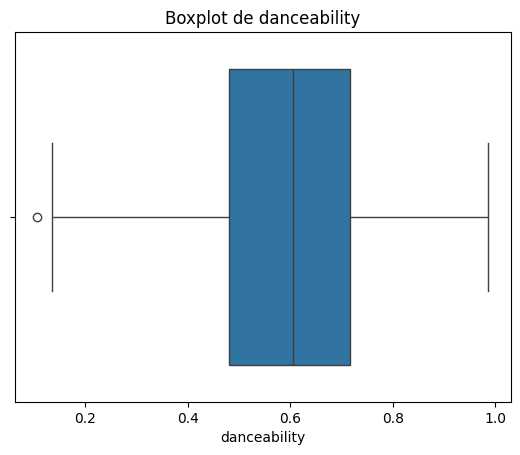

Valores atípicos en duration:
8      366179
22     361613
45      86813
47     403280
68     520661
70     344867
81     348760
117     91840
140    334853
163     75413
173    547880
197    592000
206    366773
215     46107
226     70352
241    675360
247    340867
262     93240
274    353920
293    366227
339    538800
351     55653
384     67213
388    482333
401    348640
405     79595
420    393333
445    334067
449     58671
488     33840
533    390573
543    343493
557    335667
560    362354
568    339667
571    411520
584    347707
589    350827
618    337413
631    387827
632     62622
651     56331
653    349080
666     87573
678    337228
685     81760
699    483667
700     48093
707     66481
708    352000
713    357955
730    618400
745    333827
Name: duration, dtype: int64
Nombre de outliers en duration: 53


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


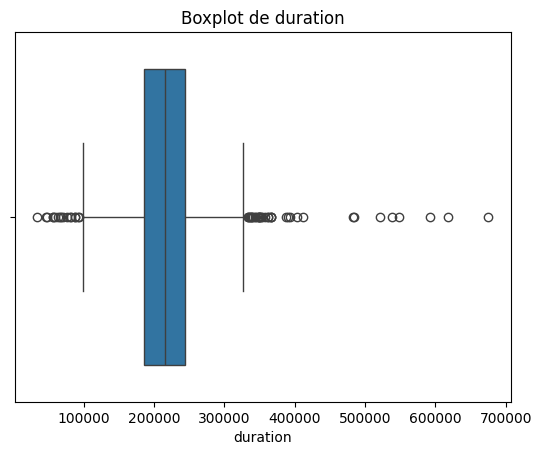

Valores atípicos en instrumentalness:
0      0.81600
3      0.21000
7      0.60900
8      0.83900
9      0.08830
        ...   
730    0.90800
736    0.52000
742    0.05030
744    0.00626
746    0.00602
Name: instrumentalness, Length: 162, dtype: float64
Nombre de outliers en instrumentalness: 162


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


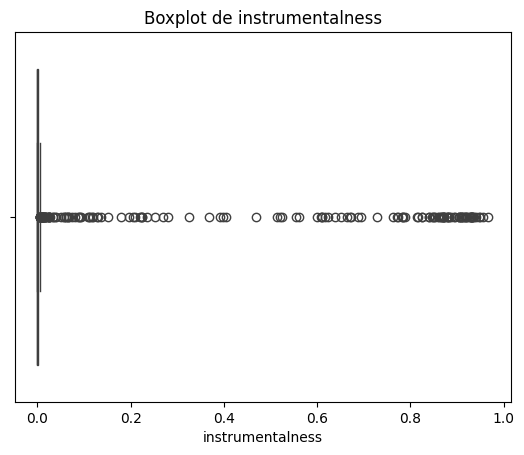

Valores atípicos en liveness:
30     0.666
68     0.979
78     0.692
119    0.839
131    0.684
132    0.966
133    0.748
137    0.716
150    0.858
159    0.744
174    0.651
178    0.684
183    0.860
188    0.584
217    0.725
223    0.546
227    0.785
236    0.765
237    0.610
249    0.527
263    0.651
266    0.673
271    0.924
281    0.931
310    0.832
355    0.528
421    0.922
425    0.873
438    0.875
453    0.905
455    0.970
467    0.659
486    0.579
490    0.540
495    0.700
498    0.675
500    0.797
508    0.546
529    0.542
538    0.825
552    0.718
586    0.531
594    0.611
600    0.831
618    0.922
623    0.637
637    0.778
643    0.583
663    0.636
678    0.874
727    0.583
Name: liveness, dtype: float64
Nombre de outliers en liveness: 51


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


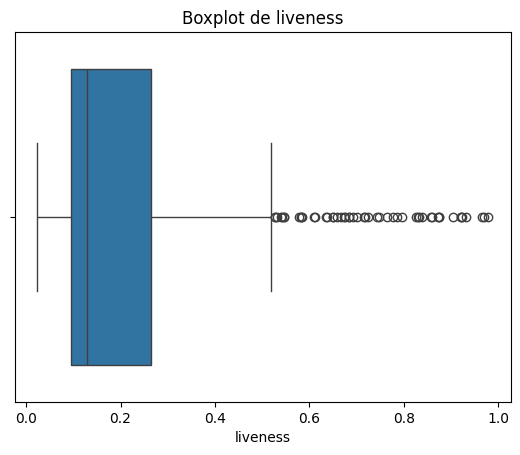

Valores atípicos en loudness:
18    -23.072
25    -25.257
32    -22.533
35    -27.385
47    -27.127
59    -19.465
69    -17.979
95    -27.817
97    -24.028
112   -22.358
120   -27.456
155   -18.487
209   -19.385
233   -22.358
241   -22.509
248   -23.758
261   -20.153
262   -18.641
276   -26.586
297   -23.072
304   -18.236
311   -19.543
339   -26.074
345   -21.306
388   -22.938
408   -23.571
410   -24.419
419   -21.133
466   -17.848
483   -18.539
496   -22.826
533   -27.473
557   -20.631
559   -28.550
560   -27.421
571   -25.335
593   -22.807
620   -29.601
622   -17.988
632   -19.265
640   -25.777
666   -19.798
687   -22.027
694   -22.814
699   -28.841
703   -20.931
708   -19.978
717   -22.696
730   -20.210
Name: loudness, dtype: float64
Nombre de outliers en loudness: 49


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


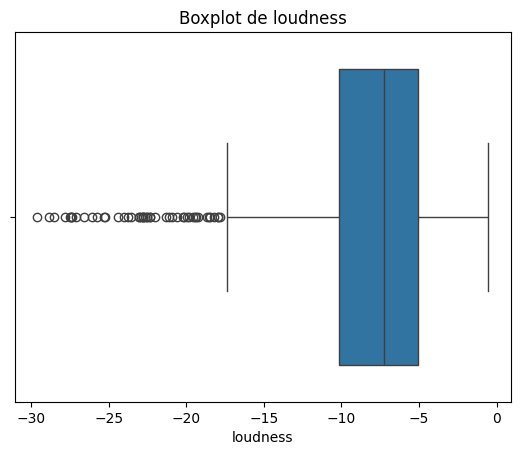

Valores atípicos en speechiness:
10     0.296
19     0.416
21     0.357
22     0.335
23     0.336
       ...  
731    0.367
732    0.335
735    0.327
736    0.337
743    0.351
Name: speechiness, Length: 96, dtype: float64
Nombre de outliers en speechiness: 96


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


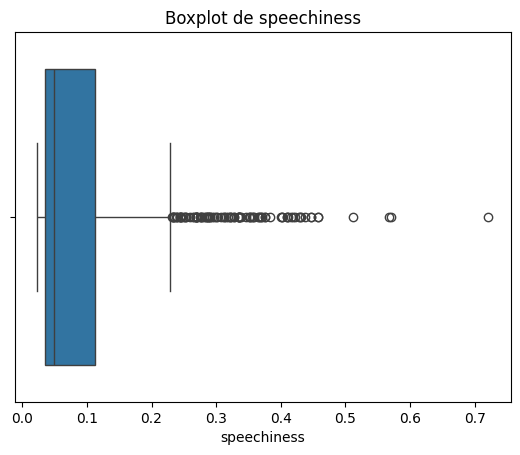

Valores atípicos en tempo:
10     199.512
195    201.843
350    203.927
377    203.669
649    201.800
654    203.988
743    204.162
Name: tempo, dtype: float64
Nombre de outliers en tempo: 7


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


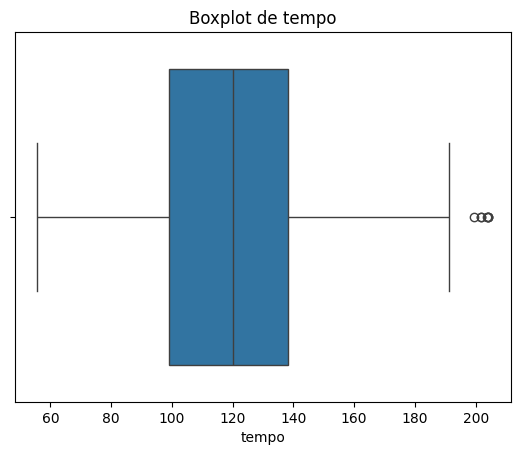

Valores atípicos en time_signature:
8      3
34     5
35     3
53     3
54     1
      ..
696    3
699    3
703    3
706    3
737    3
Name: time_signature, Length: 79, dtype: int64
Nombre de outliers en time_signature: 79


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


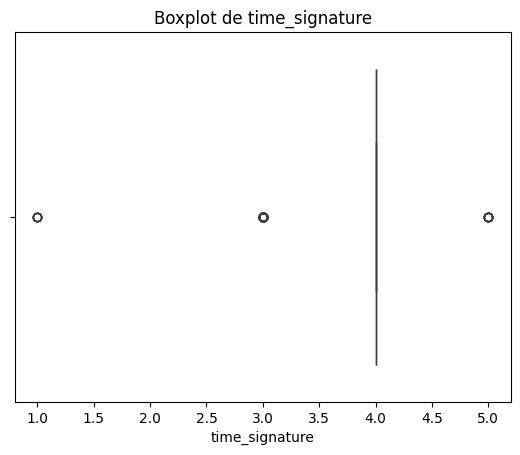

In [220]:
# Detectar valores atípicos univariados usando el rango intercuartílico (IQR)
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers


for column in tracks.select_dtypes(include=np.number):
    outliers = detect_outliers_iqr(tracks[column])
    if not outliers.empty:
        print(f"Valores atípicos en {column}:")
        print(outliers)
        print(f"Nombre de outliers en {column}: {len(outliers)}")
        plt.figure()
        sns.boxplot(x=tracks[column])
        plt.title(f"Boxplot de {column}")
        plt.show()


Tratamiento de los outliers : ....

In [194]:
#outliers
#No son molestando en este contexto ??

Deteccion de duplicacion de datos :

In [195]:
tracks[tracks.duplicated(keep=False)]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
18,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297
54,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668
82,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668
102,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199
112,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199
174,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454
204,0.002130,0.733,293543,0.5430,0.000169,1,0.0703,-10.002,1,0.0445,106.019,4,0.118
214,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834


Eliminacion de las duplicaciones +

Normalizacion

In [214]:
# Tamaño inicial
size_antes = len(tracks)

# Eliminación de duplicados
tracks_filtrado = tracks.drop_duplicates()

# Tamaño después de la eliminación de duplicados
size_despues = len(tracks_filtrado)
print(f"Se eliminaron: {size_antes - size_despues} filas duplicadas")

# Restablecimiento del índice
tracks_filtrado.reset_index(drop=True, inplace=True)

# Extracción de las columnas numéricas para normalización
cols_numeriques = tracks_filtrado.select_dtypes(include=['float64', 'int64']).columns

# Creación de una copia de las columnas no numéricas (si existen)
cols_non_numeriques = tracks_filtrado.select_dtypes(exclude=['float64', 'int64'])

# Normalización de las columnas numéricas
scaler = MinMaxScaler()
tracks_filtrado[cols_numeriques] = scaler.fit_transform(tracks_filtrado[cols_numeriques])

# Fusión con las columnas no numéricas (si existen)
if not cols_non_numeriques.empty:
    tracks_filtrado = pd.concat([cols_non_numeriques, tracks_filtrado[cols_numeriques]], axis=1)


Se eliminaron: 14 filas duplicadas


<ipython-input-214-da7611790da1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_filtrado[cols_numeriques] = scaler.fit_transform(tracks_filtrado[cols_numeriques])


Correlacion :

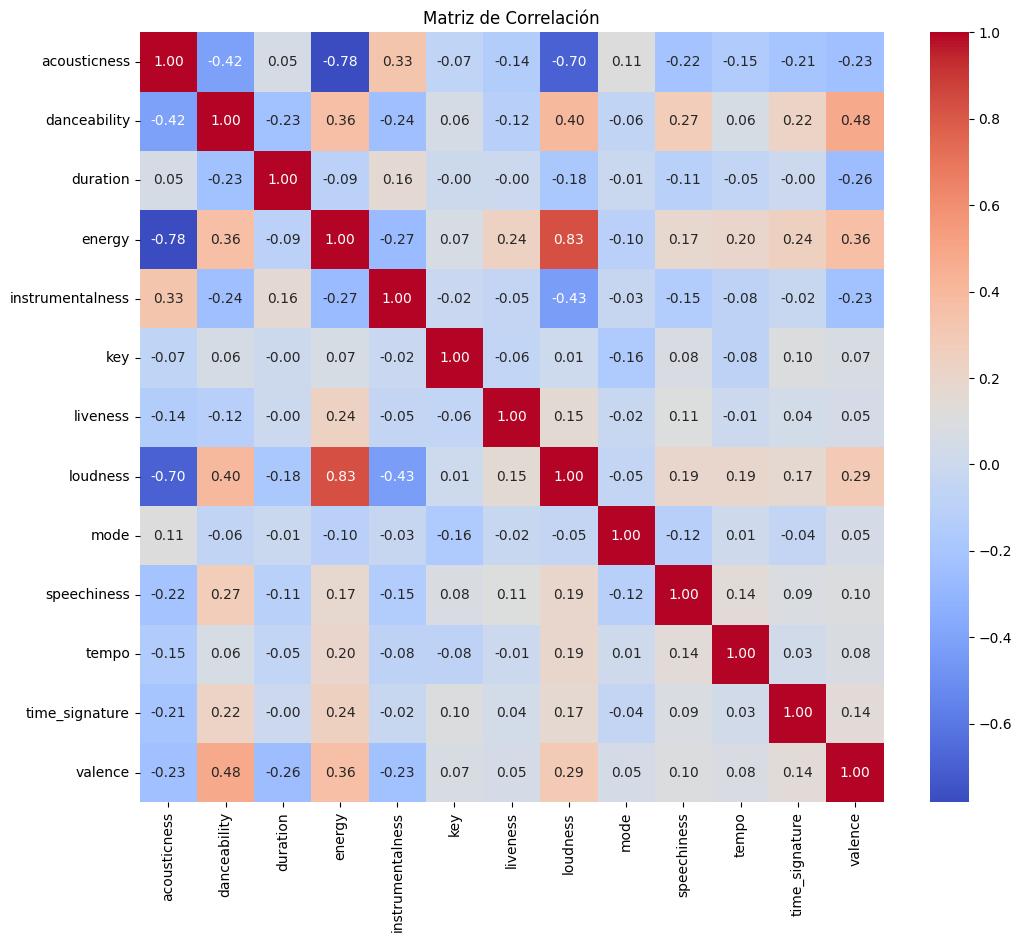

In [198]:
correlation_matrix = tracks.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


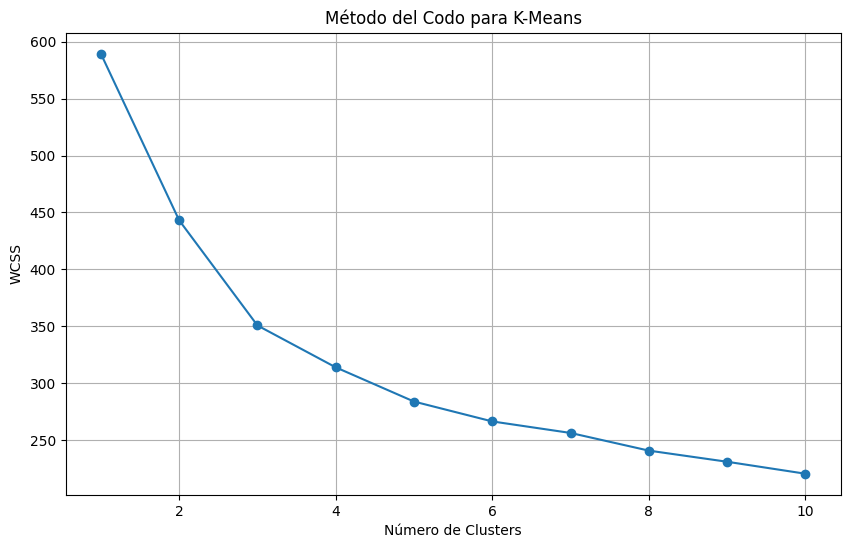

In [199]:
k_range = range(1, 11)  # Probar de 1 a 10 clusters
wcss = []

# Calcular el WCSS para cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(tracks_filtrado)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo para K-Means')
plt.grid(True)
plt.show()

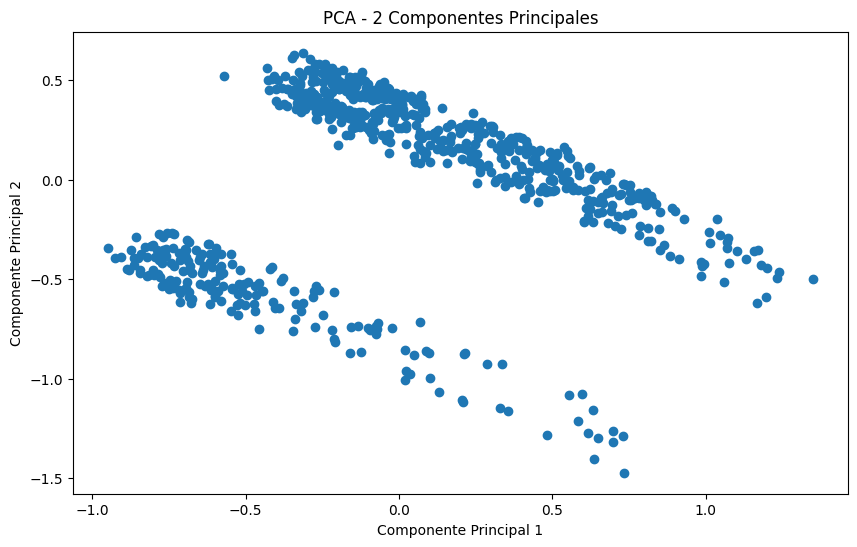

In [215]:
# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(tracks_filtrado)

# Crear un DataFrame con las componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar los datos en 2D
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - 2 Componentes Principales')
plt.show()


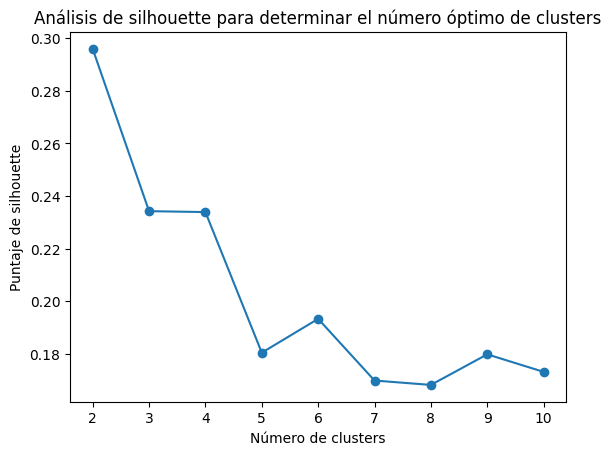

El número óptimo de clusters según el análisis de silhouette es: 2


In [222]:
range_n_clusters = range(2, 11)  # Explora de 2 a 10 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tracks_filtrado)
    silhouette_avg = silhouette_score(tracks_filtrado, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Trazar los puntajes de silhouette para diferentes números de clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Puntaje de silhouette')
plt.title('Análisis de silhouette para determinar el número óptimo de clusters')
plt.show()

# Elegir el número de clusters que corresponde al puntaje de silhouette más alto
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"El número óptimo de clusters según el análisis de silhouette es: {optimal_n_clusters}")


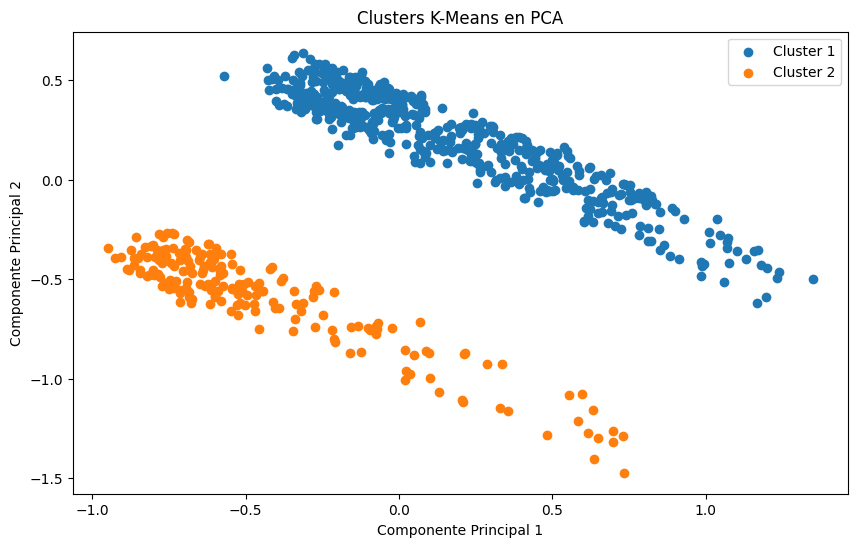

In [217]:
# Número óptimo de clusters (según el método del codo)
n_clusters = 2  # Ajustar según el gráfico del método del codo

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(principal_df)

# Asignar etiquetas de cluster a cada punto
labels = kmeans.labels_

# Visualizar los clusters en el gráfico de PCA
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(principal_df['PC1'][labels == i], principal_df['PC2'][labels == i], label=f'Cluster {i + 1}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-Means en PCA')
plt.legend()
plt.show()


In [218]:
silhouette_avg = silhouette_score(principal_df, labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")


El coeficiente de silueta promedio es: 0.5564664128149422


<Figure size 1500x1000 with 0 Axes>

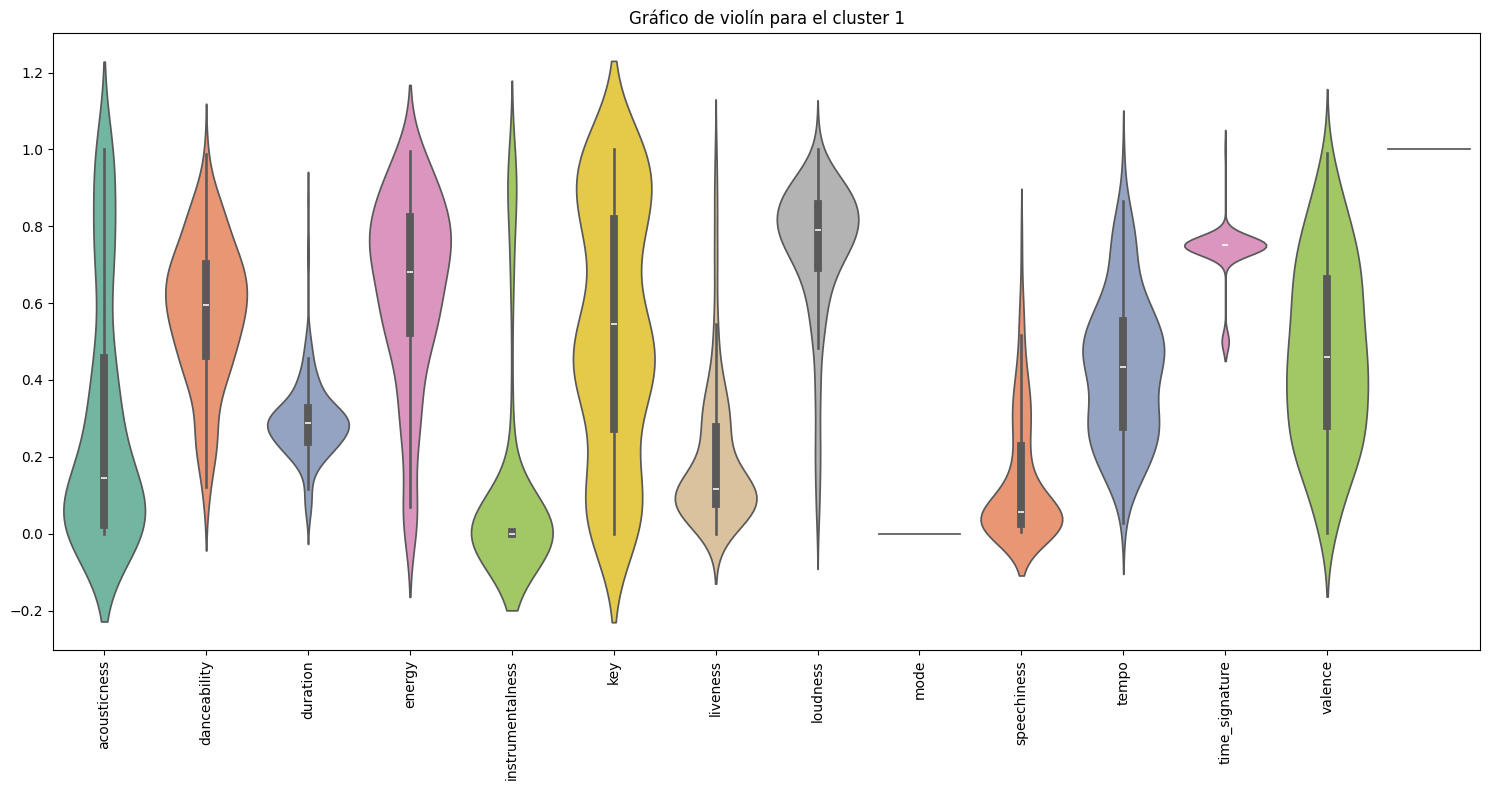

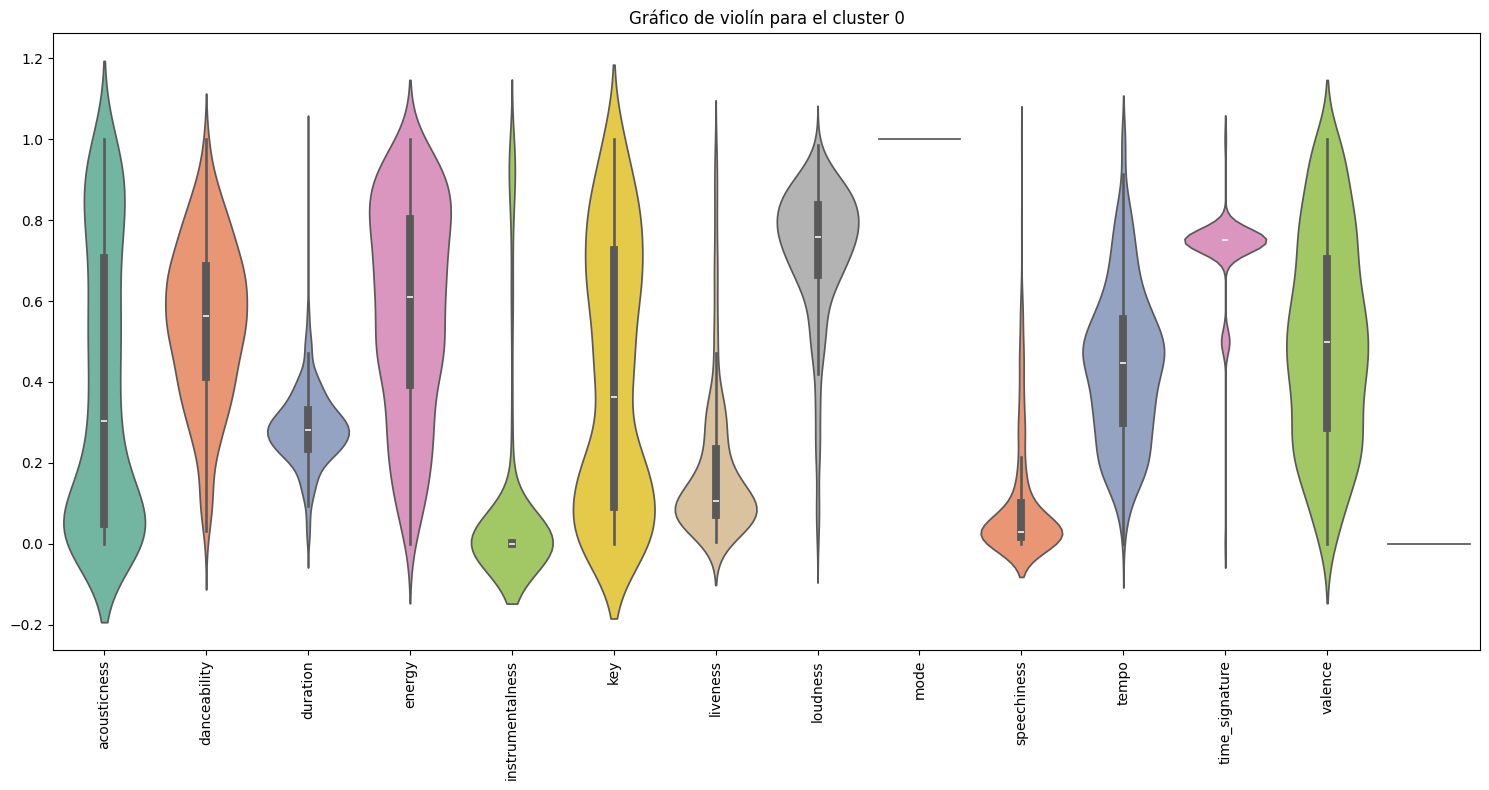

In [223]:
# Concatenación de las etiquetas de los clusters con los datos
clustered_data = pd.concat([first_13_variables, pd.DataFrame({'cluster': labels})], axis=1)

# Creación de gráficos de violín para comparar variables en cada cluster
plt.figure(figsize=(15, 10))

# Para cada cluster, crea un gráfico con todas las variables
for cluster in clustered_data['cluster'].unique():
    plt.figure(figsize=(15, 8))
    sns.violinplot(data=clustered_data[clustered_data['cluster'] == cluster], palette="Set2")
    plt.title(f'Gráfico de violín para el cluster {cluster}')
    plt.xticks(ticks=range(len(first_13_variables.columns)), labels=first_13_variables.columns, rotation=90)
    plt.tight_layout()
    plt.show()


La unica différencia real entre los dos grupos es el mode (no pertinente porque las otras variables no parecen usadas para hacer los grupos)

In [ ]:
#Otro metodo para hacer los clusters

#--> No PCA pero eligir components con pequena correlacion
#o
# --> Otro typo de preparacion de los datos (otra normalizacion, no eliminar los duplicados??)